# Power Plant Analysis of World and India

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly_express as px
import geopandas as gpd
import plotly.graph_objects as go
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
for dirname, _, filenames in os.walk('G:\Data Science\Data Science Course\kaggle\input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
powerplant_data=pd.read_csv('G:\Data Science\Data Science Course\kaggle\input\global-powerplants\powerplants (global) - global_power_plants.csv')

G:\Data Science\Data Science Course\kaggle\input\global-powerplants\powerplants (global) - global_power_plants.csv


In [3]:
powerplant_data.head()

,country code,country_long,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel2,other_fuel3,start date,owner of plant,generation_gwh_2021,geolocation_source,estimated_generation_gwh_2021
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,GEODB,123.77
1,AFG,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,18.43
2,AFG,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,18.64
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,GEODB,225.06
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,GEODB,406.16


In [4]:
powerplant_data.columns

Index(['country code', 'country_long', 'name of powerplant', 'capacity in MW',
       'latitude', 'longitude', 'primary_fuel', 'secondary fuel',
       'other_fuel2', 'other_fuel3', 'start date', 'owner of plant',
       'generation_gwh_2021', 'geolocation_source',
       'estimated_generation_gwh_2021'],
      dtype='object')

# About Power Plant
- Power plant generates electricity from various energy sources based on their availability.
- Plants may face shortage of primary energy source so it also generates electricity at full or half load using other energy sources.
- Lets check missing values and duplicate rows.

In [5]:
def count(data):
    data_columns = pd.DataFrame({'Count Missing': data.isnull().sum(),
                                'Percent Missing': data.isnull().sum()/data.shape[0]*100,
                                'Count Duplicate Rows': data.duplicated().sum(),
                                'Percent Duplicate Rows': data.duplicated().sum()/data.shape[0]*100
                                })
    return data_columns
count(powerplant_data)     

,Count Missing,Percent Missing,Count Duplicate Rows,Percent Duplicate Rows
country code,0,0.000000,0,0.0
country_long,0,0.000000,0,0.0
name of powerplant,0,0.000000,0,0.0
capacity in MW,0,0.000000,0,0.0
latitude,0,0.000000,0,0.0
longitude,0,0.000000,0,0.0
primary_fuel,0,0.000000,0,0.0
secondary fuel,32992,94.435539,0,0.0
other_fuel2,34660,99.209984,0,0.0
other_fuel3,34844,99.736661,0,0.0


- We do not have any duplicte rows but we have missing values in some columns and we will not modify that columns with mean or median value, so we will keep them as it is.
- Lets count power plants of different energy sources in World.

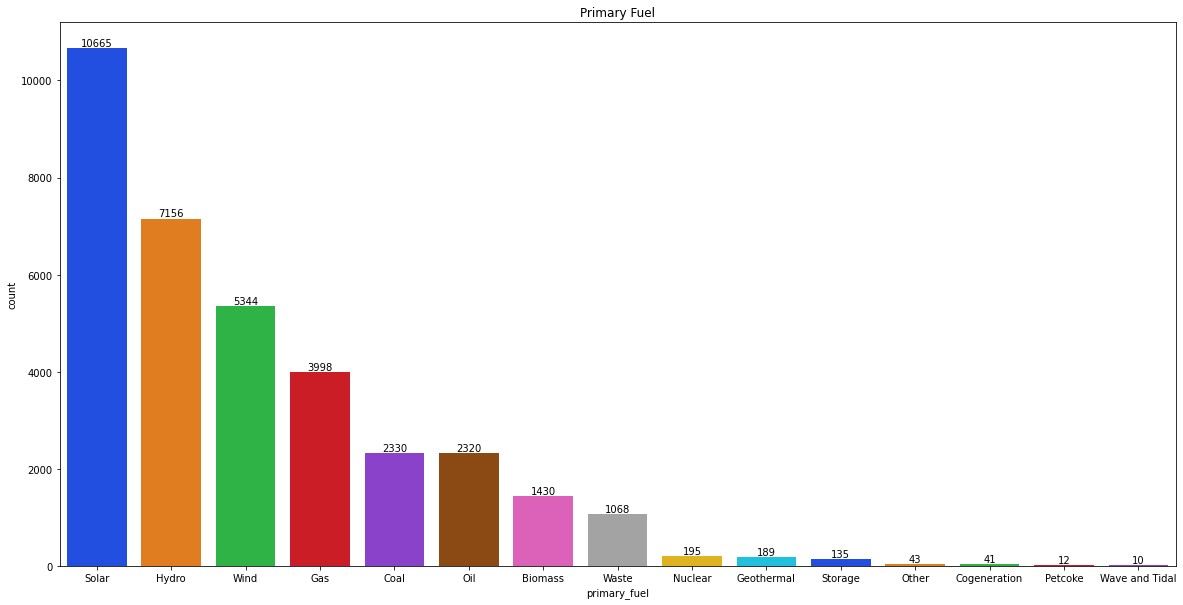

In [6]:
fig, ax  = plt.subplots(figsize=(20,10))
ax=sns.countplot(x='primary_fuel', data=powerplant_data, palette='bright', order = powerplant_data['primary_fuel'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels())
ax.bar_label(ax.containers[0])
plt.title('Primary Fuel')
plt.show()

- In overall world, solar power plants highly used as primary energy source for electricity generation.

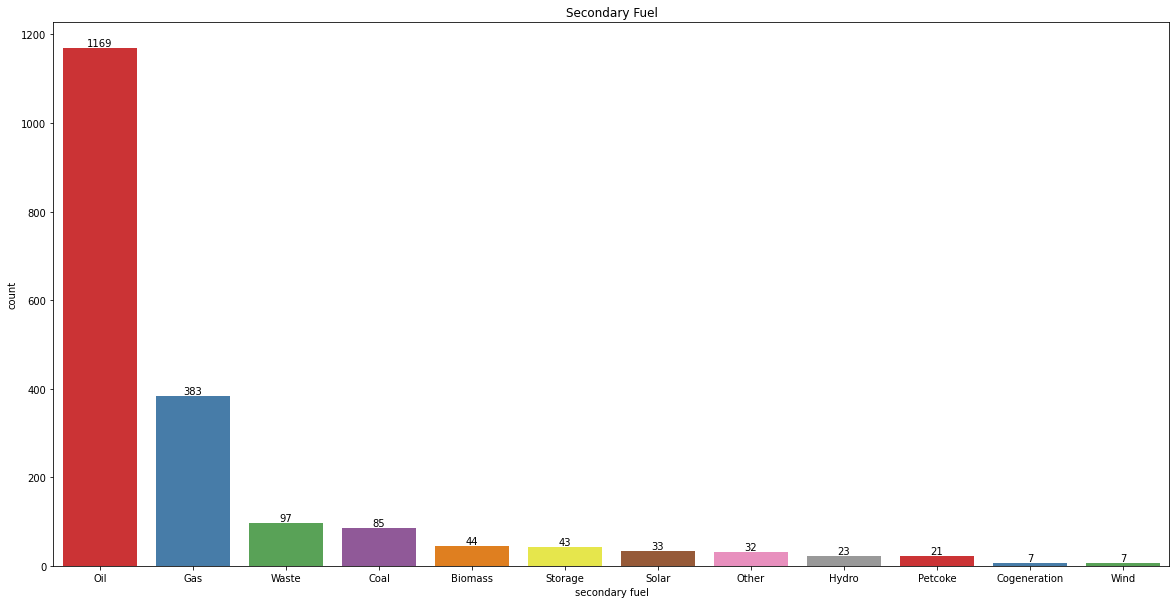

In [7]:
fig, ax  = plt.subplots(figsize=(20,10))
ax=sns.countplot(x='secondary fuel', data=powerplant_data, palette='Set1', order = powerplant_data['secondary fuel'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels())
ax.bar_label(ax.containers[0])
plt.title('Secondary Fuel')
plt.show()

- Oil power plants highly used as secondary energy source for electricity generation.

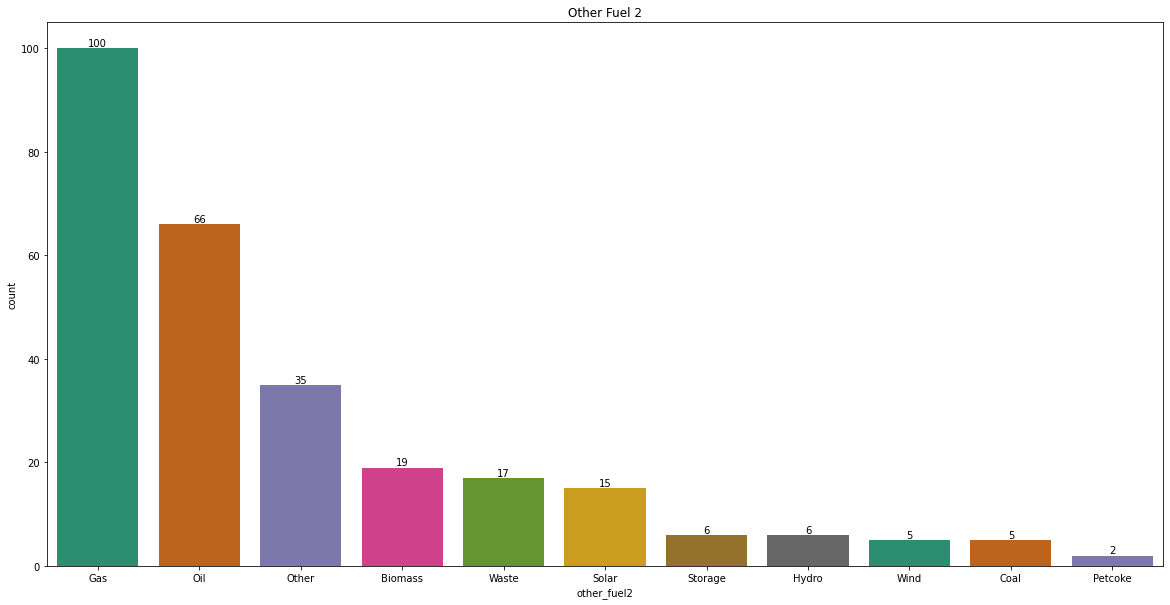

In [8]:
fig, ax  = plt.subplots(figsize=(20,10))
ax=sns.countplot(x='other_fuel2', data=powerplant_data, palette='Dark2', order = powerplant_data['other_fuel2'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels())
ax.bar_label(ax.containers[0])
plt.title('Other Fuel 2')
plt.show()

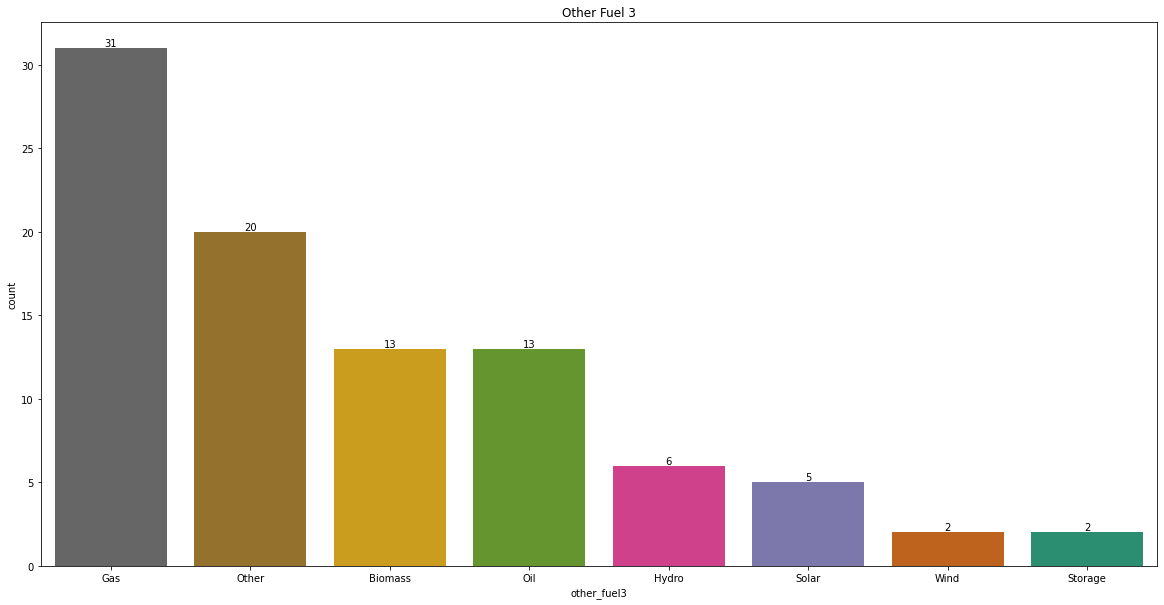

In [9]:
fig, ax  = plt.subplots(figsize=(20,10))
ax=sns.countplot(x='other_fuel3', data=powerplant_data, palette='Dark2_r', order = powerplant_data['other_fuel3'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels())
ax.bar_label(ax.containers[0])
plt.title('Other Fuel 3')
plt.show()

- Instead of primary and secondary energy sources, Gas energy is mostly used as alternative energy source for electricity generation.
- Lets count number of power plants in each country and we will check top 10 countries.

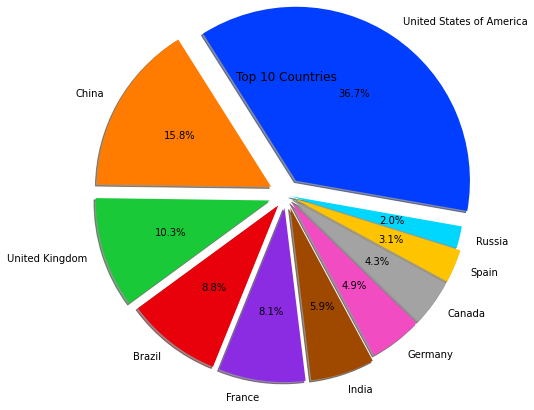

In [10]:
palette_color = sns.color_palette('bright')
plt.pie(powerplant_data['country_long'].value_counts().head(10),
        labels=powerplant_data['country_long'].value_counts().head(10).index,
        colors=palette_color,
        autopct='%.1f%%',
        radius=2,
        startangle=350,
        explode=[0.2,0.2,0.2,0.15,0.15,0.15,0.1,0.1,0.1,0.05],
        shadow=True
        )
plt.title('Top 10 Countries')
plt.show()

- Lets plot electricity generation capacity of each country on world map and we will also plot top 10 countries in another map.

In [11]:
capacity_df=pd.DataFrame(powerplant_data.groupby('country code')['capacity in MW'].sum())
capacity_df = capacity_df.sort_values(by='capacity in MW',ascending=False)
fig = px.choropleth(capacity_df.sort_values(by='capacity in MW', ascending=False),
                    locations=capacity_df.sort_values(by='capacity in MW', ascending=False).index,
                    color='capacity in MW',
                    scope='world',
                    title='Power Plant Capacity (in MW) of each country',
                    height=500
                    )
fig.show()
fig = px.choropleth(capacity_df.sort_values(by='capacity in MW', ascending=False).head(10),
                    locations=capacity_df.sort_values(by='capacity in MW', ascending=False).head(10).index,
                    color='capacity in MW',
                    scope='world',
                    title='Power Plant Capacity (in MW) of Top 10 Countries',
                    height=500
                    )
fig.show()

- ### In GitHub Plotly.js maps are not visible. So I'm adding PNG image of all maps.
- PNG image of above map. 

![power-plant-capacity](https://user-images.githubusercontent.com/108085377/208232690-259e5195-bea8-4b26-91b6-70309dcfa6dd.png)
![power-plant-capacity-10](https://user-images.githubusercontent.com/108085377/208232692-a4dd102d-567a-48ad-90e3-769ca32165fe.png)

- Lets plot capacity of estimated electricity generation in year 2021 of each country on world map and we will also plot top 10 countries in another map.

In [12]:
estimated_power=pd.DataFrame(powerplant_data.groupby('country code')['estimated_generation_gwh_2021'].sum())
estimated_power = estimated_power.sort_values(by='estimated_generation_gwh_2021',ascending=False)
fig = px.choropleth(estimated_power,
                    locations=estimated_power.index,
                    color='estimated_generation_gwh_2021',  
                    scope='world',
                    range_color=(70000,800000),
                    title='Estimated Generation (in GWh) in year 2021 of Power Plant of each country', # GWh = GigaWatt Hour
                    height=700
                    )
fig.show()
fig = px.choropleth(estimated_power.sort_values(by='estimated_generation_gwh_2021', ascending=False).head(10),
                    locations=estimated_power.sort_values(by='estimated_generation_gwh_2021', ascending=False).head(10).index,
                    color='estimated_generation_gwh_2021',
                    scope='world',
                    range_color=(70000,800000),
                    title='Estimated Generation (in GWh) in year 2021 of Power Plant of Top 10 Countries',
                    height=700
                    )
fig.show()

PNG image:

![estimated-generation](https://user-images.githubusercontent.com/108085377/208232700-2a73f669-238a-43df-a175-7a9743822afa.png)
![estimated-generation-10](https://user-images.githubusercontent.com/108085377/208232704-8d1d5765-44c3-43cb-80a0-00588735f349.png)

# Analysis of India
## Creating dataset of India

In [13]:
india_data=powerplant_data.query("country_long in ['India']")
india_data = india_data.reset_index(drop=True)
india_data.head()

,country code,country_long,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,other_fuel2,other_fuel3,start date,owner of plant,generation_gwh_2021,geolocation_source,estimated_generation_gwh_2021
0,IND,India,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,NaN,National Renewable Energy Laboratory,4.37
1,IND,India,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,NaN,WRI,NaN
2,IND,India,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,NaN,WRI,NaN
3,IND,India,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,NaN,WRI,NaN
4,IND,India,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,NaN,WRI,NaN


In [14]:
df_1900_00 = india_data[(india_data['start date'] <  2000)]
df_2000_21 = india_data[(india_data['start date'] >= 2000)]
df_2000_09 = df_2000_21[(df_2000_21['start date'] <  2010)]
df_2010_21 = india_data[(india_data['start date'] >= 2010)]
print('1. Number of Power Plants in India :',india_data.shape[0])
print('2. Out of these, we have start date (year) of only {0} power plants which are installed on or before {1}.'.format(india_data['start date'].count(),int(india_data['start date'].max())))
print('3. The first power plant in India is installed in {0}.'.format(int(india_data['start date'].min())))
print('4. {0} power plants are installed before 2000.'.format(df_1900_00['start date'].value_counts().sum()))
print('5. {0} power plants are installed in last 2 decades.'.format(df_2000_21['start date'].value_counts().sum()))
print("    - {0} power plants are installed in '10s decade.".format(df_2000_09['start date'].value_counts().sum()))
print("    - {0} power plants are installed in '20s decade.".format(df_2010_21['start date'].value_counts().sum()))
print('6. In {0}, India newly started highest i.e., {1} number of power plants in a year.'.format(int(india_data['start date'].mode()),india_data['start date'][india_data['start date']==int(india_data['start date'].mode())].count()))
print(" # Let's check missing values - ")
count(india_data)

1. Number of Power Plants in India : 1589
2. Out of these, we have start date (year) of only 496 power plants which are installed on or before 2018.
3. The first power plant in India is installed in 1927.
4. 232 power plants are installed before 2000.
5. 264 power plants are installed in last 2 decades.
    - 112 power plants are installed in '10s decade.
    - 152 power plants are installed in '20s decade.
6. In 2015, India newly started highest i.e., 25 number of power plants in a year.
 # Let's check missing values - 


,Count Missing,Percent Missing,Count Duplicate Rows,Percent Duplicate Rows
country code,0,0.000000,0,0.0
country_long,0,0.000000,0,0.0
name of powerplant,0,0.000000,0,0.0
capacity in MW,0,0.000000,0,0.0
latitude,0,0.000000,0,0.0
longitude,0,0.000000,0,0.0
primary_fuel,0,0.000000,0,0.0
secondary fuel,1396,87.853996,0,0.0
other_fuel2,1588,99.937067,0,0.0
other_fuel3,1589,100.000000,0,0.0


- 'other_fuel2', 'other_fuel3' and 'generation_gwh_2021' columns does not have any records.
- 'country code', 'country_long' is same in all records.
- We will not consider 'owner of plant', 'geolocation_source' columns.
- Let's drop these columns.

In [15]:
india_data.drop(columns=['country code','country_long','other_fuel2','other_fuel3','owner of plant','generation_gwh_2021','geolocation_source'], inplace=True)
count(india_data)

,Count Missing,Percent Missing,Count Duplicate Rows,Percent Duplicate Rows
name of powerplant,0,0.000000,0,0.0
capacity in MW,0,0.000000,0,0.0
latitude,0,0.000000,0,0.0
longitude,0,0.000000,0,0.0
primary_fuel,0,0.000000,0,0.0
secondary fuel,1396,87.853996,0,0.0
start date,1093,68.785400,0,0.0
estimated_generation_gwh_2021,508,31.969792,0,0.0


- Lets count primary and secondary energy sources in India

In [16]:
def energy_source(source):  # Function to display energy source and their count
    print("Energy sources, used as {0}, in power plants of India:".format(source))
    print("No. - Source : Count")
    for i in range(len(india_data[source].value_counts())):
        print("{0} : {1} - {2}".format(i+1,india_data[source].value_counts().sort_values(ascending= False).index[i],india_data[source].value_counts().sort_values(ascending= False)[i]))
energy_source('primary_fuel')
print()
energy_source('secondary fuel')

Energy sources, used as primary_fuel, in power plants of India:
No. - Source : Count
1 : Solar - 851
2 : Coal - 253
3 : Hydro - 233
4 : Wind - 108
5 : Gas - 68
6 : Biomass - 50
7 : Oil - 17
8 : Nuclear - 9

Energy sources, used as secondary fuel, in power plants of India:
No. - Source : Count
1 : Oil - 190
2 : Gas - 2
3 : Cogeneration - 1


- India also have Solar power plants in more number as campared to other energy sources.
- In 193 power plants, Oil, Gas and Cogeneration energy sources are used as secondary energy source to generate electricity.
## About Cogeneration : 
- 'Cogeneration' is a technique for producing heat and electricity in one process that can save considerable amounts of energy. The supply of high-temperature heat (steam) first drives a steam turbine-powered generator. The resulting low-temperature waste heat (steam) is then used for water or space heating. 
- Many process industries, such as chemical plants, oil refineries and pulp and paper mills, require large amounts of process heat (steam). The lower-pressure steam leaving the turbine can then be used for process heat.
- We can read more about cogeneration, [here.](https://en.wikipedia.org/wiki/Cogeneration "Wikipedia : Cogeneration ")
- Lets plot pie chart for primary and secondary energy sources used in Power Plants.

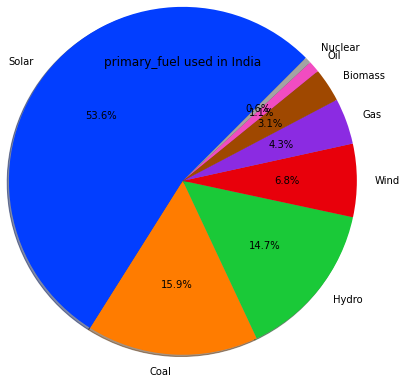

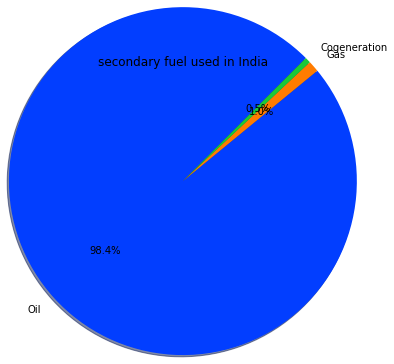

In [17]:
def energy_piechart(source):    # function to plot pie chart
    palette_color = sns.color_palette('bright')
    plt.pie(india_data[source].value_counts(),
            labels=india_data[source].value_counts().index,
            colors=palette_color,
            autopct='%.1f%%',
            radius=2,
            startangle = 45,
            shadow=True
            )
    plt.title('{0} used in India'.format(source))
    plt.show()
energy_piechart('primary_fuel')
energy_piechart('secondary fuel')

## Let's analyze electricity generation capacity of each energy source in India:

# 1. Solar Power Plants

In [18]:
india_solar=india_data.query("primary_fuel in ['Solar']")
india_solar = india_solar.reset_index(drop=True)
india_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name of powerplant             851 non-null    object 
 1   capacity in MW                 851 non-null    float64
 2   latitude                       851 non-null    float64
 3   longitude                      851 non-null    float64
 4   primary_fuel                   851 non-null    object 
 5   secondary fuel                 0 non-null      object 
 6   start date                     4 non-null      float64
 7   estimated_generation_gwh_2021  848 non-null    float64
dtypes: float64(5), object(3)
memory usage: 53.3+ KB


- Lets plot solar power plants locations in asia map.

In [19]:
def asia_map(data,power):
    print(' # The total capacity of {0} power plants in India is {1} MW'.format(power,int(data['capacity in MW'].sum())))
    fig = px.scatter_geo(data,
                        lat='latitude',
                        lon='longitude',
                        scope = 'asia',
                        color = 'capacity in MW',
                        color_continuous_scale='rdbu_r',
                        hover_name="name of powerplant",
                        title='{0} Power Plant locations in India'.format(power),
                        height = 800)
    fig.show()
    if data['name of powerplant'].count() < 25:
        pass
    else:
        data_25 = data.sort_values(by='capacity in MW', ascending=False).head(25)
        fig = px.scatter_geo(data_25,
                            lat='latitude',
                            lon='longitude',
                            scope = 'asia',
                            color = 'capacity in MW',
                            color_continuous_scale='temps_r',
                            hover_name="name of powerplant",
                            title='Top 25 {0} Power Plant locations in India'.format(power),
                            height = 800)
        fig.show()
india_solar['estimated_generation_gwh_2021'] = india_solar['estimated_generation_gwh_2021'].astype(float)
print(' # Estimated electricity generation of solar power plants in 2021 is {0} MW'.format(int(india_solar['estimated_generation_gwh_2021'].sum())))
asia_map(india_solar,'Solar')

 # Estimated electricity generation of solar power plants in 2021 is 52571 MW
 # The total capacity of Solar power plants in India is 25549 MW


PNG image:

![solar-locations](https://user-images.githubusercontent.com/108085377/208232182-a9eab2b7-f50c-4c80-96bb-64211967227a.png)
![solar-25-locations](https://user-images.githubusercontent.com/108085377/208232184-78d1d5ab-6f50-410c-ac54-6e67f99fd9b0.png)

In [20]:
india_solar['secondary fuel'].value_counts()

Series([], Name: secondary fuel, dtype: int64)

- Solar Power Plants does not use secondory energy sources.

# 2. Coal Power Plants

In [21]:
india_coal=india_data.query("primary_fuel in ['Coal']")
india_coal = india_coal.reset_index(drop=True)
asia_map(india_coal,'Coal')

 # The total capacity of Coal power plants in India is 204919 MW


PNG image:

![coal-locations](https://user-images.githubusercontent.com/108085377/208232202-9be307c4-d4c5-4a9b-865b-d529a463ee60.png)
![coal-25-locations](https://user-images.githubusercontent.com/108085377/208232207-db6a53f6-789b-4e3b-8c2a-397c4142079a.png)

In [22]:
india_coal['secondary fuel'].value_counts()

Oil             183
Cogeneration      1
Name: secondary fuel, dtype: int64

- Lets plot power plants locations working on coal and oil energy sources in asia map.

In [23]:
india_coal_oil=india_coal.query("primary_fuel in ['Coal']")
india_coal_oil['secondary fuel'].fillna("0", inplace=True)
india_coal_oil = india_coal_oil[(india_coal_oil['secondary fuel'] == 'Oil')]
asia_map(india_coal_oil,"'Coal + Oil'")

 # The total capacity of 'Coal + Oil' power plants in India is 199493 MW


PNG image:

![coal+oil-locations](https://user-images.githubusercontent.com/108085377/208232214-1d9d2ecf-b69e-4bcd-9054-04d38358d5b2.png)
![coal+oil-25-locations](https://user-images.githubusercontent.com/108085377/208232216-c3fe51da-ff37-46a5-ae12-24f7b2553a6e.png)

- So top 25 coal power plants works on Coal as primary and Oil as secondary energy source.

# 3. Hydro Power Plants

In [24]:
india_hydro=india_data.query("primary_fuel in ['Hydro']")
india_hydro = india_hydro.reset_index(drop=True)
print(' # Estimated electricity generation of hydro power plants in 2021 is {0} MW'.format(int(india_hydro['estimated_generation_gwh_2021'].sum())))
asia_map(india_hydro,'Hydro')

 # Estimated electricity generation of hydro power plants in 2021 is 180061 MW
 # The total capacity of Hydro power plants in India is 45561 MW


PNG image:

![hydro-locations](https://user-images.githubusercontent.com/108085377/208232220-33da3e26-e1a4-461b-8f16-ccd6e23e8eb3.png)
![hydro-25-locations](https://user-images.githubusercontent.com/108085377/208232232-9bf78afa-382f-4221-b19d-7236a263b165.png)

In [25]:
india_hydro['secondary fuel'].value_counts()

Series([], Name: secondary fuel, dtype: int64)

- Hydro Power Plants does not use secondory energy sources.

# 4. Wind Power Plants

In [26]:
india_wind=india_data.query("primary_fuel in ['Wind']")
india_wind = india_wind.reset_index(drop=True)
asia_map(india_wind,'Wind')

 # The total capacity of Wind power plants in India is 3647 MW


PNG image:

![wind-locations](https://user-images.githubusercontent.com/108085377/208232238-4c5eff3d-18ac-4fc8-999c-7cede68fa5fe.png)
![wind-25-locations](https://user-images.githubusercontent.com/108085377/208232240-a41f0664-83d9-49a0-851e-e6532cfb134d.png)

In [27]:
india_wind['secondary fuel'].value_counts()

Series([], Name: secondary fuel, dtype: int64)

- Wind Power Plants does not use secondory energy sources.

# 5. Gas Power Plants

In [28]:
india_gas=india_data.query("primary_fuel in ['Gas']")
india_gas = india_gas.reset_index(drop=True)
asia_map(india_gas,'Gas')

 # The total capacity of Gas power plants in India is 24947 MW


PNG image:

![gas-locations](https://user-images.githubusercontent.com/108085377/208232243-df7c4a2a-c234-4f64-8e02-60f35a7a192b.png)
![gas-25-locations](https://user-images.githubusercontent.com/108085377/208232248-befd7c8c-9c97-4f8c-bee8-367f0b94a8a1.png)

In [29]:
india_gas['secondary fuel'].value_counts()

Oil    7
Name: secondary fuel, dtype: int64

In [30]:
india_gas_oil=india_gas.query("primary_fuel in ['Gas']")
india_gas_oil = india_gas_oil[(india_gas_oil['secondary fuel'] == 'Oil')]
asia_map(india_gas_oil,"'Gas + Oil'")

 # The total capacity of 'Gas + Oil' power plants in India is 2570 MW


PNG image:

![gas+oil-locations](https://user-images.githubusercontent.com/108085377/208232257-581fa2d9-d427-4874-a742-a02c2c5f8db4.png)

# 6. Biomass Power Plants

In [31]:
india_biomass=india_data.query("primary_fuel in ['Biomass']")
india_biomass = india_biomass.reset_index(drop=True)
asia_map(india_biomass,'Biomass')

 # The total capacity of Biomass power plants in India is 1003 MW


PNG image:

![biomass-locations](https://user-images.githubusercontent.com/108085377/208232270-72135a93-e632-4c2d-b708-47a14fa7c1f6.png)
![biomss-25-locations](https://user-images.githubusercontent.com/108085377/208232272-9e1cbed8-00ee-4be0-9d20-fd996d202ff2.png)

In [32]:
india_biomass['secondary fuel'].value_counts()

Series([], Name: secondary fuel, dtype: int64)

- Biomass Power Plants does not use secondory energy sources.

# 7. Oil Power Plants

In [33]:
india_oil=india_data.query("primary_fuel in ['Oil']")
india_oil = india_oil.reset_index(drop=True)
asia_map(india_oil,'Oil')

 # The total capacity of Oil power plants in India is 1680 MW


PNG image:

![oil-locations](https://user-images.githubusercontent.com/108085377/208232395-ce47c62e-f934-444c-ac8f-50f2486235b5.png)

In [34]:
india_oil['secondary fuel'].value_counts()

Gas    2
Name: secondary fuel, dtype: int64

In [35]:
india_oil_gas=india_oil.query("primary_fuel in ['Oil']")
india_oil_gas['secondary fuel'].fillna("0", inplace=True)
india_oil_gas = india_oil_gas[(india_oil_gas['secondary fuel'] == 'Gas')]
asia_map(india_oil_gas,"'Oil + Gas'")

 # The total capacity of 'Oil + Gas' power plants in India is 650 MW


PNG image:

![oil+gas-locations](https://user-images.githubusercontent.com/108085377/208232405-9d1b3701-4e26-4c18-b70c-d9baed2c616b.png)

In [36]:
india_oil_gas.head()

,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,secondary fuel,start date,estimated_generation_gwh_2021
14,TROMBAY,500.0,19.0004,72.8983,Oil,Gas,1990.0,NaN
15,TROMBAY_Oil,150.0,19.0004,72.8983,Oil,Gas,1965.0,NaN


- Both Oil power plant with secondary Gas energy source located at one location.

# 8. Nuclear Power Plants

In [37]:
india_nuclear=india_data.query("primary_fuel in ['Nuclear']")
india_nuclear = india_nuclear.reset_index(drop=True)
asia_map(india_nuclear,'Nuclear')

 # The total capacity of Nuclear power plants in India is 8780 MW


- PNG image

![nuclear-locations](https://user-images.githubusercontent.com/108085377/208232298-271fc801-2047-40c9-b717-4ddf7dfa93ad.png)

- We have Oil, Gas and Cogeneration energy sources as secondary fuel.
- Out of these, Oil and Gas are also used as primary fuel in power plants
- So we will make a new column for Oil and Gas which counts total Oil and Gas power plants in India.

In [38]:
energy_source('primary_fuel')
energy_source('secondary fuel')

Energy sources, used as primary_fuel, in power plants of India:
No. - Source : Count
1 : Solar - 851
2 : Coal - 253
3 : Hydro - 233
4 : Wind - 108
5 : Gas - 68
6 : Biomass - 50
7 : Oil - 17
8 : Nuclear - 9
Energy sources, used as secondary fuel, in power plants of India:
No. - Source : Count
1 : Oil - 190
2 : Gas - 2
3 : Cogeneration - 1


- There are 17 power plants which uses oil as primary energy source.
- There are 190 power plants which uses oil as secondary energy source.
- There are 68 power plants which uses gas as primary energy source.
- There are 2 power plants which uses gas as secondary energy source.
- Lets combine power plants working on same energy source and plot their locations on map.

#  9. All Oil Plants

In [39]:
india_data['Primary Oil Plants']=india_data['primary_fuel'].apply(lambda x:1 if 'Oil' in x else 0)
india_data['secondary fuel'].fillna("0", inplace=True)
india_data['Secondary Oil Plants']=india_data['secondary fuel'].apply(lambda x:1 if 'Oil' in x else 0)
india_data['All_Oil_Plants'] = (india_data['Primary Oil Plants']+india_data['Secondary Oil Plants'])
india_data.drop(columns=['Primary Oil Plants','Secondary Oil Plants'], inplace=True)
all_oil_plants=india_data.query("All_Oil_Plants in [1]") 
all_oil_plants = all_oil_plants.reset_index(drop=True)
asia_map(all_oil_plants,'All Oil')

 # The total capacity of All Oil power plants in India is 203743 MW


PNG image:

![all-oil-locations](https://user-images.githubusercontent.com/108085377/208232321-b2056130-0bf3-436b-acdb-b7ac7d571759.png)
![all-oil-25-locations](https://user-images.githubusercontent.com/108085377/208232327-85065367-5c23-4ad4-8e37-d3a411756534.png)

# 10. All Gas Plants

In [40]:
india_data['Primary Gas Plants']=india_data['primary_fuel'].apply(lambda x:1 if 'Gas' in x else 0)
india_data['secondary fuel'].fillna("0", inplace=True)
india_data['Secondary Gas Plants']=india_data['secondary fuel'].apply(lambda x:1 if 'Gas' in x else 0)
india_data['All_Gas_Plants'] = (india_data['Primary Gas Plants']+india_data['Secondary Gas Plants'])
india_data.drop(columns=['Primary Gas Plants','Secondary Gas Plants'], inplace=True)
all_gas_plants=india_data.query("All_Gas_Plants in [1]") 
all_gas_plants = all_gas_plants.reset_index(drop=True)
asia_map(all_gas_plants,'All Gas')

 # The total capacity of All Gas power plants in India is 25597 MW


PNG image:

![all-gas-locations](https://user-images.githubusercontent.com/108085377/208232329-00b3ce1a-3b74-4b6b-b9c9-ccd590e0e19e.png)
![all-gas-25-locations](https://user-images.githubusercontent.com/108085377/208232331-58f16a43-346b-46ae-bb14-7afaeb2b3cbd.png)

- Lets make new dataframe of all energy sources and their electricity generation capacity. 

In [52]:
all_energy_source = pd.DataFrame({
                                'Power Plant':['Solar','Coal','Hydro','Wind','Gas','Biomass','Oil','Nuclear'],
                                'Count':[
                                        india_solar['name of powerplant'].count(),
                                        india_coal['name of powerplant'].count(),
                                        india_hydro['name of powerplant'].count(),
                                        india_wind['name of powerplant'].count(),
                                        all_gas_plants['name of powerplant'].count(),
                                        india_biomass['name of powerplant'].count(),
                                        all_oil_plants['name of powerplant'].count(),
                                        india_nuclear['name of powerplant'].count(),
                                        ],
                                'Capacity (MW)':[
                                        india_solar['capacity in MW'].sum(),
                                        india_coal['capacity in MW'].sum(),
                                        india_hydro['capacity in MW'].sum(),
                                        india_wind['capacity in MW'].sum(),
                                        all_gas_plants['capacity in MW'].sum(),
                                        india_biomass['capacity in MW'].sum(),
                                        all_oil_plants['capacity in MW'].sum(),
                                        india_nuclear['capacity in MW'].sum(),
                                        ],
                                })
all_energy_source['Capacity (%)'] = (all_energy_source['Capacity (MW)']/all_energy_source['Capacity (MW)'].sum())*100
all_energy_source                            

,Power Plant,Count,Capacity (MW),Capacity (%)
0,Solar,851,25549.100,4.924637
1,Coal,253,204919.220,39.498568
2,Hydro,233,45561.470,8.782060
3,Wind,108,3647.150,0.702995
4,Gas,70,25597.506,4.933968
5,Biomass,50,1003.260,0.193380
6,Oil,207,203743.935,39.272030
7,Nuclear,9,8780.000,1.692362


- Coal, Gas, Oil and Nuclear are non-renewable energy while Solar, Hydro, Wind and Biomass are renewable energy sources.
- Count column denotes number of respective power plants installed in India.
- Capacity (MW) column denotes overall capacity of all respective power plants to generate electricity at full load in a year.
- Lets sort out values in descending order.

In [53]:
all_energy_source.sort_values(by='Capacity (MW)', ascending=False, ignore_index=True)

,Power Plant,Count,Capacity (MW),Capacity (%)
0,Coal,253,204919.220,39.498568
1,Oil,207,203743.935,39.272030
2,Hydro,233,45561.470,8.782060
3,Gas,70,25597.506,4.933968
4,Solar,851,25549.100,4.924637
5,Nuclear,9,8780.000,1.692362
6,Wind,108,3647.150,0.702995
7,Biomass,50,1003.260,0.193380


- The power plants with Coal and Oil as energy sources have capacity to generate more than 2 lakh MW electricity and together fullfills 80% of electricity requirement in a year.
- Hydro power plants are approximately equal in number of Coal and Oil power plants but fullfills only 9% of total electricity requirement.
- Together Gas and Solar power plants fullfills 10% of electricity requirement in a year.
- Solar power plants are 851 in number but produce only 5% of total electricity requirement.
- Nuclear, Wind and Biomass power plants contribute neglegible amount of electricity.
- Lets find out Average Capacity (MW) which denotes electricity generation capacity per plant.

In [54]:
all_energy_source['Avg Capacity (MW)']=[
                                        india_solar['capacity in MW'].sum()/india_solar['name of powerplant'].count(),
                                        india_coal['capacity in MW'].sum()/india_coal['capacity in MW'].count(),
                                        india_hydro['capacity in MW'].sum()/india_hydro['capacity in MW'].count(),
                                        india_wind['capacity in MW'].sum()/india_wind['capacity in MW'].count(),
                                        all_gas_plants['capacity in MW'].sum()/all_gas_plants['capacity in MW'].count(),
                                        india_biomass['capacity in MW'].sum()/india_biomass['capacity in MW'].count(),
                                        all_oil_plants['capacity in MW'].sum()/all_oil_plants['capacity in MW'].count(),
                                        india_nuclear['capacity in MW'].sum()/india_nuclear['capacity in MW'].count(),
                                        ]
all_energy_source['Avg Capacity (%)'] = (all_energy_source['Avg Capacity (MW)']/all_energy_source['Avg Capacity (MW)'].sum())*100
all_energy_source.sort_values(by='Avg Capacity (MW)', ascending=False, ignore_index=True)

,Power Plant,Count,Capacity (MW),Capacity (%),Avg Capacity (MW),Avg Capacity (%)
0,Oil,207,203743.935,39.272030,984.270217,28.823132
1,Nuclear,9,8780.000,1.692362,975.555556,28.567934
2,Coal,253,204919.220,39.498568,809.957391,23.718597
3,Gas,70,25597.506,4.933968,365.678657,10.708446
4,Hydro,233,45561.470,8.782060,195.542790,5.726228
5,Wind,108,3647.150,0.702995,33.769907,0.988910
6,Solar,851,25549.100,4.924637,30.022444,0.879170
7,Biomass,50,1003.260,0.193380,20.065200,0.587584


- It is clear that non-renewable energy sources have capacity to generate more amount of electricity as compared to renewable energy sources.
- Power plants based on Oil, Nuclear and Coal as energy sources generates more than 800 MW per plant.
- Though nuclear power plants are less in number but can have capacity to generate more than 900 MW of electricity per plant. 
- Lets find out distribution of each energy sources.

Text(0.5, 1.0, 'Biomass Energy Source distribution')

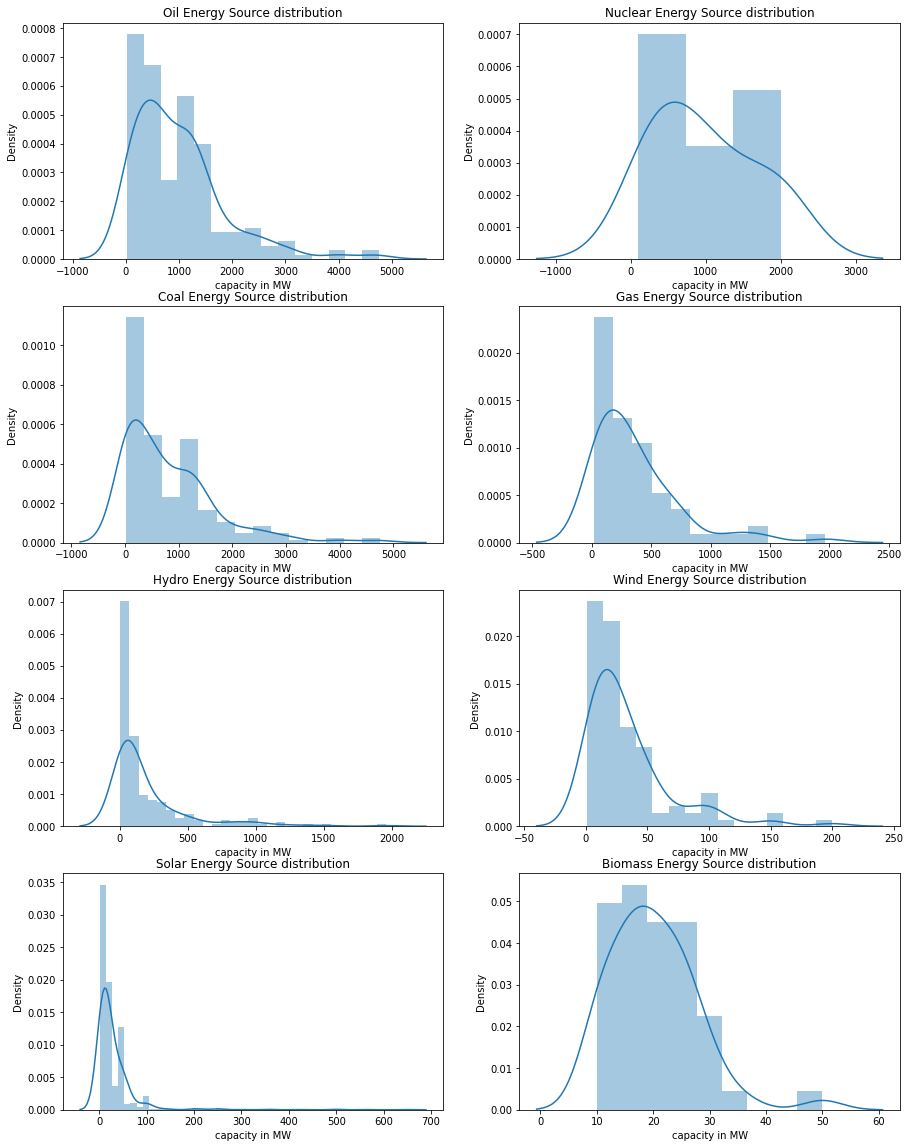

In [50]:
plt.subplots(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(all_oil_plants['capacity in MW'])
plt.title('Oil Energy Source distribution')
plt.subplot(4,2,2)
sns.distplot(india_nuclear['capacity in MW'])
plt.title('Nuclear Energy Source distribution')
# plt.subplots(figsize=(18,5))
plt.subplot(4,2,3)
sns.distplot(india_coal['capacity in MW'])
plt.title('Coal Energy Source distribution')
plt.subplot(4,2,4)
sns.distplot(all_gas_plants['capacity in MW'])
plt.title('Gas Energy Source distribution')
# plt.subplots(figsize=(15,5))
plt.subplot(4,2,5)
sns.distplot(india_hydro['capacity in MW'])
plt.title('Hydro Energy Source distribution')
plt.subplot(4,2,6)
sns.distplot(india_wind['capacity in MW'])
plt.title('Wind Energy Source distribution')
# plt.subplots(figsize=(15,5))
plt.subplot(4,2,7)
sns.distplot(india_solar['capacity in MW'])
plt.title('Solar Energy Source distribution')
plt.subplot(4,2,8)
sns.distplot(india_biomass['capacity in MW'])
plt.title('Biomass Energy Source distribution')

- Except Nuclear Energy Source all other energy source distibutions are Right Skewed.
- In future, if coal power plants faces coal stock shortage then it is  necessary to analyze which energy source will fullfill generation capacity of all Coal Power Plants.

In [57]:
# all_energy_source['Capacity (%)'] = (all_energy_source['Capacity (MW)']/india_coal['capacity in MW'].sum())*100
all_energy_source['Required Plants in Future'] = (india_coal['capacity in MW'].sum()/all_energy_source['Capacity (MW)'])*all_energy_source['Count']
all_energy_source['Required Plants in Future'] = all_energy_source['Required Plants in Future'].astype(int)
all_energy_source['Total Count'] = all_energy_source['Count']+all_energy_source['Required Plants in Future']
# all_energy_source['New Capacity (MW)'] = all_energy_source['Required Plants in Future']*all_energy_source['Avg Capacity (MW)']
all_energy_source.sort_values(by='Total Count',ignore_index=True)

,Power Plant,Count,Capacity (MW),Capacity (%),Avg Capacity (MW),Avg Capacity (%),Required Plants in Future,Total Count
0,Nuclear,9,8780.000,1.692362,975.555556,28.567934,210,219
1,Oil,207,203743.935,39.272030,984.270217,28.823132,208,415
2,Coal,253,204919.220,39.498568,809.957391,23.718597,253,506
3,Gas,70,25597.506,4.933968,365.678657,10.708446,560,630
4,Hydro,233,45561.470,8.782060,195.542790,5.726228,1047,1280
5,Wind,108,3647.150,0.702995,33.769907,0.988910,6068,6176
6,Solar,851,25549.100,4.924637,30.022444,0.879170,6825,7676
7,Biomass,50,1003.260,0.193380,20.065200,0.587584,10212,10262


- So Nuclear and Oil power plants can replace coal power plants in Future, if we faces coal stock shortage.
- But oil power plants becomes almost double in number, i.e. today in India we have almost 207 Oil Power Plants and in future we need almost 415 Oil Power Plants.
- In future we need only 219 Nuclear Power Plants which is again less in number of present Coal Power Plants in India.
- So we can say that Nuclear Energy is the future energy source to fullfill electricity requirement, if we face coal stock source shortage.